In [1]:
# Import the dependecies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90.000,90.000,size=1500)
lngs = np.random.uniform(-180.000,180.000,size=1500)
lat_lngs = zip(lats,lngs)

lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

627

In [6]:
# Import dependencies
import requests
from config import weather_api_key

In [7]:
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | mollendo
Processing Record 4 of Set 1 | northam
Processing Record 5 of Set 1 | ruatoria
City not found. Skipping...
Processing Record 6 of Set 1 | ancud
Processing Record 7 of Set 1 | abha
Processing Record 8 of Set 1 | muros
Processing Record 9 of Set 1 | bilma
Processing Record 10 of Set 1 | hamina
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | mocambique
City not found. Skipping...
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | port moresby
Processing Record 15 of Set 1 | lompoc
Processing Record 16 of Set 1 | murindo
Processing Record 17 of Set 1 | chuy
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | naze
Processing Record 20 of Set 1 | barrow
Processing Record 21 of Set 1 | touros
Processing Record 22 

In [10]:
len(city_data)

576

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,74.14,76,96,22.95,PF,2021-09-23 23:06:20
1,Punta Arenas,-53.1500,-70.9167,44.58,76,100,8.55,CL,2021-09-23 23:02:40
2,Mollendo,-17.0231,-72.0147,60.31,88,89,4.32,PE,2021-09-23 23:06:20
3,Northam,51.0333,-4.2167,58.66,93,91,4.14,GB,2021-09-23 23:06:21
4,Ancud,-41.8697,-73.8203,53.42,84,98,9.55,CL,2021-09-23 23:06:22
5,Abha,18.2164,42.5053,64.65,68,20,4.61,SA,2021-09-23 23:06:22
6,Muros,42.7762,-9.0603,67.23,74,25,11.68,ES,2021-09-23 23:06:23
7,Bilma,18.6853,12.9164,86.23,13,3,2.39,NE,2021-09-23 23:06:23
8,Hamina,60.5697,27.1979,45.68,81,100,24.81,FI,2021-09-23 23:06:24
9,Jamestown,42.0970,-79.2353,54.52,81,90,8.99,US,2021-09-23 23:03:44


In [12]:
# Reorder the columns
new_columns = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

city_data_df = city_data_df[new_columns]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-09-23 23:06:20,-23.1203,-134.9692,74.14,76,96,22.95
1,Punta Arenas,CL,2021-09-23 23:02:40,-53.1500,-70.9167,44.58,76,100,8.55
2,Mollendo,PE,2021-09-23 23:06:20,-17.0231,-72.0147,60.31,88,89,4.32
3,Northam,GB,2021-09-23 23:06:21,51.0333,-4.2167,58.66,93,91,4.14
4,Ancud,CL,2021-09-23 23:06:22,-41.8697,-73.8203,53.42,84,98,9.55
5,Abha,SA,2021-09-23 23:06:22,18.2164,42.5053,64.65,68,20,4.61
6,Muros,ES,2021-09-23 23:06:23,42.7762,-9.0603,67.23,74,25,11.68
7,Bilma,NE,2021-09-23 23:06:23,18.6853,12.9164,86.23,13,3,2.39
8,Hamina,FI,2021-09-23 23:06:24,60.5697,27.1979,45.68,81,100,24.81
9,Jamestown,US,2021-09-23 23:03:44,42.0970,-79.2353,54.52,81,90,8.99


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

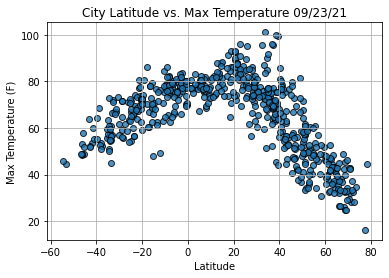

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

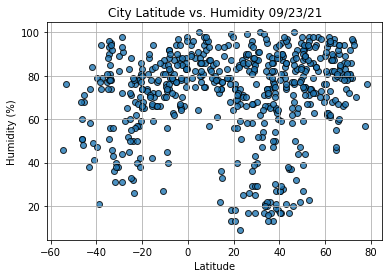

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

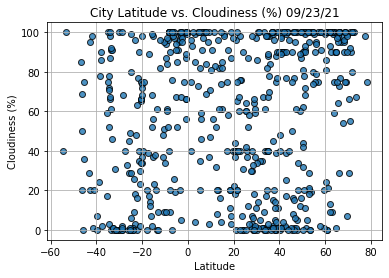

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

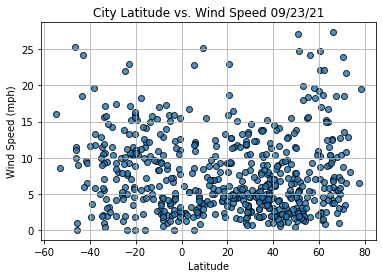

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                         Chuy
Country                        UY
Date          2021-09-23 23:06:27
Lat                      -33.6971
Lng                      -53.4616
Max Temp                    54.88
Humidity                       95
Cloudiness                     91
Wind Speed                   5.48
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3       True
4      False
       ...  
571     True
572     True
573     True
574    False
575    False
Name: Lat, Length: 576, dtype: bool

In [22]:
city_data_df.loc[city_data_df["Lat"] >= 0].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Northam,GB,2021-09-23 23:06:21,51.0333,-4.2167,58.66,93,91,4.14
5,Abha,SA,2021-09-23 23:06:22,18.2164,42.5053,64.65,68,20,4.61
6,Muros,ES,2021-09-23 23:06:23,42.7762,-9.0603,67.23,74,25,11.68
7,Bilma,NE,2021-09-23 23:06:23,18.6853,12.9164,86.23,13,3,2.39
8,Hamina,FI,2021-09-23 23:06:24,60.5697,27.1979,45.68,81,100,24.81


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

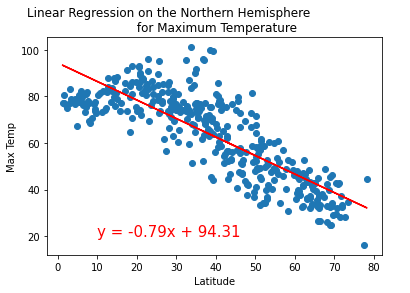

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\
                        \n for Maximum Temperature','Max Temp',(10,20))


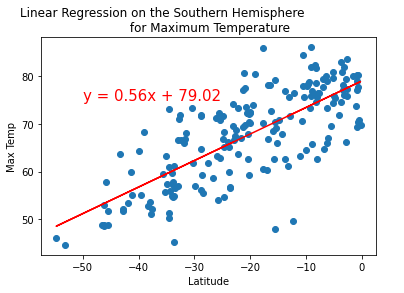

In [27]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere\
                        \n for Maximum Temperature','Max Temp', (-50,75))

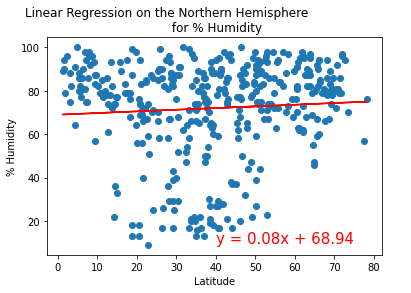

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        \n for % Humidity', '% Humidity',(40,10))

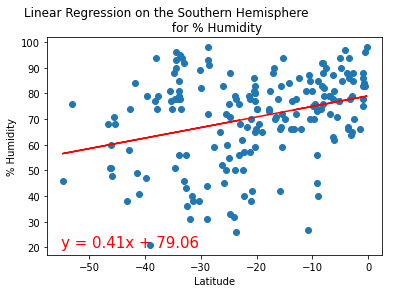

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        \n for % Humidity', '% Humidity',(-55,20))

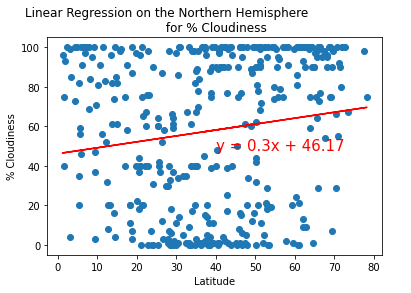

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        \n for % Cloudiness', '% Cloudiness',(40,48))

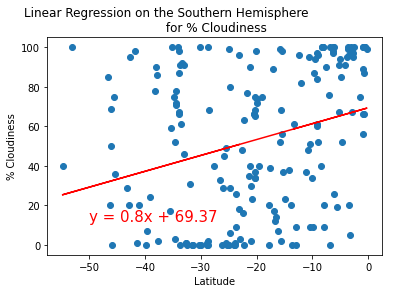

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        \n for % Cloudiness', '% Cloudiness',(-50,12))

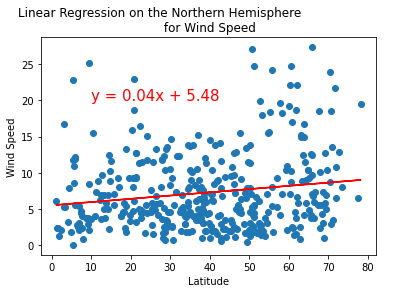

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        \n for Wind Speed', 'Wind Speed',(10,20))

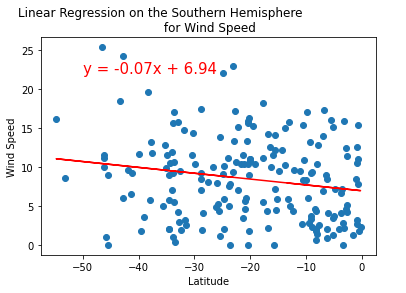

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        \n for Wind Speed', 'Wind Speed',(-50,22))